In [13]:
import sympy as sym
import numpy as np 
from IPython.display import display
import handcalcs.render


# create symbolic variables

# system parameters
X0,Y0 = sym.symbols(['X0','Y0']) # fixed position of first link
g = sym.symbols('g')
m1,m2,m3 = sym.symbols(['m1','m2','m3']) # mass of links
l1,l2,l3 = sym.symbols(['l1','l2','l3']) # length of links
In1,In2,In3 = sym.symbols(['In1','In2','In3']) # moment of intertia of links

# generalized coordinates
th1,th2,th3 = sym.symbols(['theta1','theta2','theta3']) #position
dth1,dth2,dth3 = sym.symbols(['\dot{\\theta}_{1}','\dot{\\theta}_{2}','\dot{\\theta}_{3}']) #velocity
ddth1,ddth2,ddth3 = sym.symbols(['\ddot{\\theta}_{1}','\ddot{\\theta}_{2}','\ddot{\\theta}_{3}']) #acceleration

display(dq) #display prints it as cool latex stuff

Matrix([
[\dot{\theta}_{1}],
[\dot{\theta}_{2}],
[\dot{\theta}_{3}]])

In [14]:
%%tex
#q = sym.Matrix([[th1],[th2],[th3]])
dq = sym.Matrix([[dth1],[dth2],[dth3]])
#ddq = sym.Matrix([[ddth1],[ddth2],[ddth3]])

#display(dq) #display prints it as cool latex stuff


\[
\begin{aligned}
\mathrm{dq} &= Matrix([[\dot{\theta}_{{1}], [\dot{\theta}_{{2}], [\dot{\theta}_{{3}]])}}}}}}}}} \; 
\end{aligned}
\]


In [10]:
# STEP 1: write expressions for the system space coordinates in terms of the generalized coordinates and parameters
th1a = th1 #absolute angle
th2a = th2 + th1 
th3a = th3 + th2 + th1

x1 = X0 + 0.5*l1*sym.sin(th1a)
y1 = Y0 - 0.5*l1*sym.cos(th1a)

x2 = X0 + l1*sym.sin(th1a) + 0.5*l2*sym.sin(th2a)
y2 = Y0 - l1*sym.cos(th1a) - 0.5*l2*sym.cos(th2a)

x3 = X0 + l1*sym.sin(th1a) + 0.5*l2*sym.sin(th2a) + 0.5*l3*sym.sin(th3a)
y3 = Y0 - l1*sym.cos(th1a) - 0.5*l2*sym.cos(th2a) - 0.5*l3*sym.cos(th3a)

# STEP 2: generate expressions for the system space velocities
p1 = sym.Matrix([x1,y1,th1])
[dx1,dy1,dth1a] = p1.jacobian(q)*dq

p2 = sym.Matrix([x2,y2,th2a])
[dx2,dy2,dth2a] = p2.jacobian(q)*dq

p3 = sym.Matrix([x3,y3,th3a])
[dx3,dy3,dth3a] = p3.jacobian(q)*dq

#display(dx3)
#display(p1)
#display(p1.jacobian(q))

In [ ]:
%%lex


In [3]:
# STEP 3: generate expressions for the kinetic and potential energy

T = sym.Matrix([0.5*m1*(dx1**2+dy1**2) + 0.5*m2*(dx2**2+dy2**2)+0.5*m3*(dx3**2+dy3**2) + 0.5*In1*dth1a**2 + 0.5*In2*dth2a**2+ 0.5*In3*dth3a**2])
V = sym.Matrix([m1*g*y1 + m2*g*y2+m3*g*y3])
#display(T)
#display(V)

# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

#combine
EOM = Lg1 - Lg3 + Lg4

#display(EOM) #<-this will give you an idea of the magnitude of the faff a decent symbolic package lets you avoid

In [6]:
#initial conditions
th10 = np.pi/4
th20 = 0
th30 = 0
dth10 = 0
dth20 = 0
dth30 = 0

h = 0.1

#parameters
X0val = 0
Y0val = 2
l1val = 0.2
l2val = 1
l3val = 1

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(m1,1),(m2,1),(m3,1),(l1,l1val),(l2,l2val),(l3,l3val),(In1,0.08),(In2,0.08),(In3,0.08)]

th1ar = [th10]
th2ar = [th20]
th3ar = [th30]
dth1ar = [dth10]
dth2ar = [dth20]
dth3ar = [dth30]


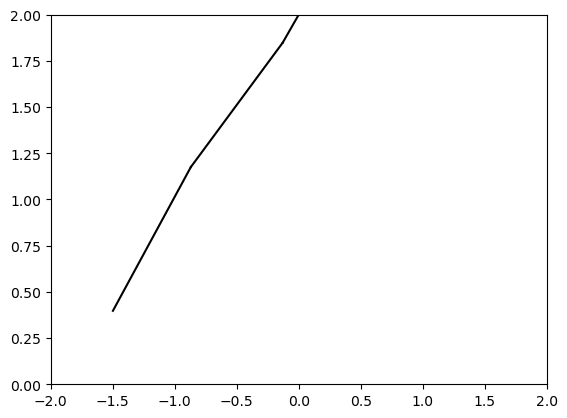

In [7]:
N = 100
for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th1,th1ar[i-1]),(th2,th2ar[i-1]),(th3,th3ar[i-1]),(dth1,dth1ar[i-1]),(dth2,dth2ar[i-1]),(dth3,dth3ar[i-1])]
    EOM_sub = EOM.subs(parameter_values).subs(past)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth1, ddth2,ddth3])
    
    # integrate for the next velocity and position    
    dth1ar.append(float(dth1ar[i-1]+h*acc[ddth1]))
    dth2ar.append(float(dth2ar[i-1]+h*acc[ddth2]))
    dth3ar.append(float(dth3ar[i-1]+h*acc[ddth3]))
    th1ar.append(float(th1ar[i-1]+h*dth1ar[i]))
    th2ar.append(float(th2ar[i-1]+h*dth2ar[i]))
    th3ar.append(float(th3ar[i-1]+h*dth3ar[i]))
    #animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
#%matplotlib inline
fig1, ax1 = plt.subplots(1,1) #create axes

def plot_pendulum(i,th1_in,th2_in,th3_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([0,2])
    
    #plot link 1
    L1topx = X0val
    L1topy = Y0val
    L1bottomx = X0val + l1val*np.sin(th1_in[i])
    L1bottomy = Y0val - l1val*np.cos(th1_in[i])
    ax.plot([L1topx,L1bottomx],[L1topy,L1bottomy],color='xkcd:black')
    
    #plot link 2
    L2bottomx = L1bottomx + l2val*np.sin(th1_in[i] + th2_in[i])
    L2bottomy = L1bottomy - l2val*np.cos(th1_in[i] + th2_in[i]) 
    ax.plot([L1bottomx,L2bottomx],[L1bottomy,L2bottomy],color='xkcd:black')
    
    #plot link 3
    L3bottomx = L2bottomx + l3val*np.sin(th2_in[i] + th3_in[i])
    L3bottomy = L2bottomy - l3val*np.cos(th2_in[i] + th3_in[i]) 
    ax.plot([L2bottomx,L3bottomx],[L2bottomy,L3bottomy],color='xkcd:black')
    
update = lambda i: plot_pendulum(i,th1ar,th2ar,th3ar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

html=animate.to_html5_video() #convert the animation to HTML5 to embed it in the notebook
HTML(html)

In [12]:
# Manipulator Equation (M*ddq + C + G = Tau + Q)

# M Matrix
M = sym.zeros(len(q),len(q))

for i in range(len(q)):
    for j in range(len(q)):
        M[i,j] = sym.diff(sym.diff(T,dq[i]),dq[j])
display(M)

M = sym.simplify(M)
display(M)

#M_size = int(np.sqrt(len(M))) # assumes square matrix (len(M))

#dM = sym.zeros(M_size,M_size)

#for i in range(M_size):
 #   for j in range(M_size):
#        dM[i,j] = sym.Matrix([M[i,j]]).jacobian(q)*dq
#display(M)

# C Matrix
#C = dM*dq - (sym.Matrix([T]).jacobian(q)).transpose() # 3x1 - 1x3^Transpose
#display(C)

# G Matrix
#G = (sym.Matrix([V]).jacobian(q)).transpose() # 3x1

#display(G)


Matrix([
[1.0*In1 + 1.0*In2 + 1.0*In3 + 0.5*m1*(0.5*l1**2*sin(theta1)**2 + 0.5*l1**2*cos(theta1)**2) + 0.5*m2*((l1*sin(theta1) + 0.5*l2*sin(theta1 + theta2))*(2*l1*sin(theta1) + l2*sin(theta1 + theta2)) + (l1*cos(theta1) + 0.5*l2*cos(theta1 + theta2))*(2*l1*cos(theta1) + l2*cos(theta1 + theta2))) + 0.5*m3*((l1*sin(theta1) + 0.5*l2*sin(theta1 + theta2) + 0.5*l3*sin(theta1 + theta2 + theta3))*(2*l1*sin(theta1) + l2*sin(theta1 + theta2) + l3*sin(theta1 + theta2 + theta3)) + (l1*cos(theta1) + 0.5*l2*cos(theta1 + theta2) + 0.5*l3*cos(theta1 + theta2 + theta3))*(2*l1*cos(theta1) + l2*cos(theta1 + theta2) + l3*cos(theta1 + theta2 + theta3))), 1.0*In2 + 1.0*In3 + 0.5*m2*(0.5*l2*(2*l1*sin(theta1) + l2*sin(theta1 + theta2))*sin(theta1 + theta2) + 0.5*l2*(2*l1*cos(theta1) + l2*cos(theta1 + theta2))*cos(theta1 + theta2)) + 0.5*m3*((0.5*l2*sin(theta1 + theta2) + 0.5*l3*sin(theta1 + theta2 + theta3))*(2*l1*sin(theta1) + l2*sin(theta1 + theta2) + l3*sin(theta1 + theta2 + theta3)) + (0.5*l2*cos(theta1

Matrix([
[1.0*In1 + 1.0*In2 + 1.0*In3 + 0.25*l1**2*m1 + 0.5*m2*(2.0*l1**2 + 2.0*l1*l2*cos(theta2) + 0.5*l2**2) + 0.5*m3*(2.0*l1**2 + 2.0*l1*l2*cos(theta2) + 2.0*l1*l3*cos(theta2 + theta3) + 0.5*l2**2 + 1.0*l2*l3*cos(theta3) + 0.5*l3**2), 1.0*In2 + 1.0*In3 + 0.25*l2*m2*(2*l1*cos(theta2) + l2) + 0.25*m3*(2*l1*l2*cos(theta2) + 2*l1*l3*cos(theta2 + theta3) + l2**2 + 2*l2*l3*cos(theta3) + l3**2), 1.0*In3 + 0.25*l3*m3*(2*l1*cos(theta2 + theta3) + l2*cos(theta3) + l3)],
[                                                     1.0*In2 + 1.0*In3 + 0.5*l2*m2*(1.0*l1*cos(theta2) + 0.5*l2) + 0.5*m3*(1.0*l1*l2*cos(theta2) + 1.0*l1*l3*cos(theta2 + theta3) + 0.5*l2**2 + 1.0*l2*l3*cos(theta3) + 0.5*l3**2),                                                                           1.0*In2 + 1.0*In3 + 0.25*l2**2*m2 + 0.25*m3*(l2**2 + 2*l2*l3*cos(theta3) + l3**2),                             1.0*In3 + 0.25*l3*m3*(l2*cos(theta3) + l3)],
[                                                                        